In [1]:
#Telecom Attrition & Churn Project in RStudio
#Author: Gio Abou Jaoude
#Full data available courtesy of Anish N. Sharma @ "https://www.kaggle.com/anish9167473766/churndata" taken(1/23/2018)
#The goal of this project is to develop an algorithm for determining "Churn?" based on the data provided. Two methods,
#general linear regression and decision tree were attempted to similar success. K-Fold Validation(5) was then applied to
#determine model accuracy.
#-For explanations/edits/errors please contact gga222@nyu.edu-
#Last Update:1/24/2018

In [2]:
#Step 1: Load libraries and Telecomdata as "celldata", seed rng
rm(list=ls()); cat("\014"); options(warn=-1); set.seed(2018)
library(plyr); library(corrplot); library(ggplot2);
library(gridExtra); library(ggthemes); library(caret); library(Amelia)
library(MASS); library(randomForest); library(readr); library(party)
celldata= read_csv("C:/Users/Gio/Desktop/Coding/Telecom_cutomer_attrition.csv")
#-No masked object is required for execution(ignore)-

corrplot 0.84 loaded
Loading required package: lattice
Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:ggplot2':

    margin

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4

Attaching package: 'modeltools'

The following object is masked from 'package:plyr':

    empty

Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwic

    State           Account_Length    Area_Code        Phone          
 Length:3333        Min.   :  1.0   Min.   :408.0   Length:3333       
 Class :character   1st Qu.: 74.0   1st Qu.:408.0   Class :character  
 Mode  :character   Median :101.0   Median :415.0   Mode  :character  
                    Mean   :101.1   Mean   :437.2                     
                    3rd Qu.:127.0   3rd Qu.:510.0                     
                    Max.   :243.0   Max.   :510.0                     
  Int'l_Plan         VMail_Plan        VMail_Message       Day_Mins    
 Length:3333        Length:3333        Min.   : 0.000   Min.   :  0.0  
 Class :character   Class :character   1st Qu.: 0.000   1st Qu.:143.7  
 Mode  :character   Mode  :character   Median : 0.000   Median :179.4  
                                       Mean   : 8.099   Mean   :179.8  
                                       3rd Qu.:20.000   3rd Qu.:216.4  
                                       Max.   :51.000   Max.   :350.8  

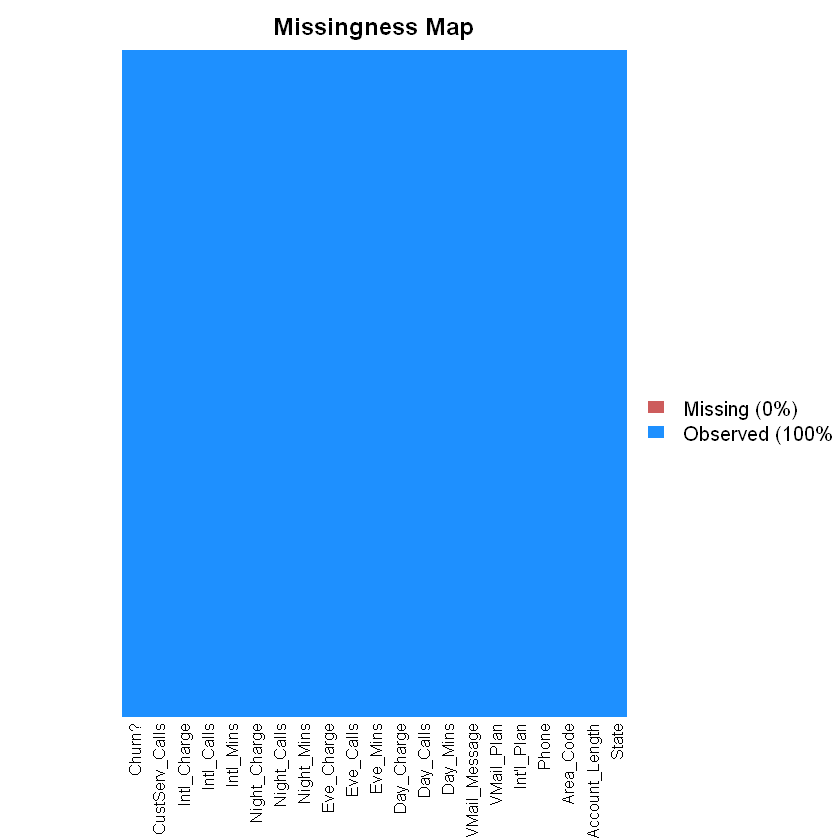

In [3]:
#Step 2: Explore and identify missing data(none)
missmap(celldata,y.labels = NULL,y.at = NULL);summary(celldata)

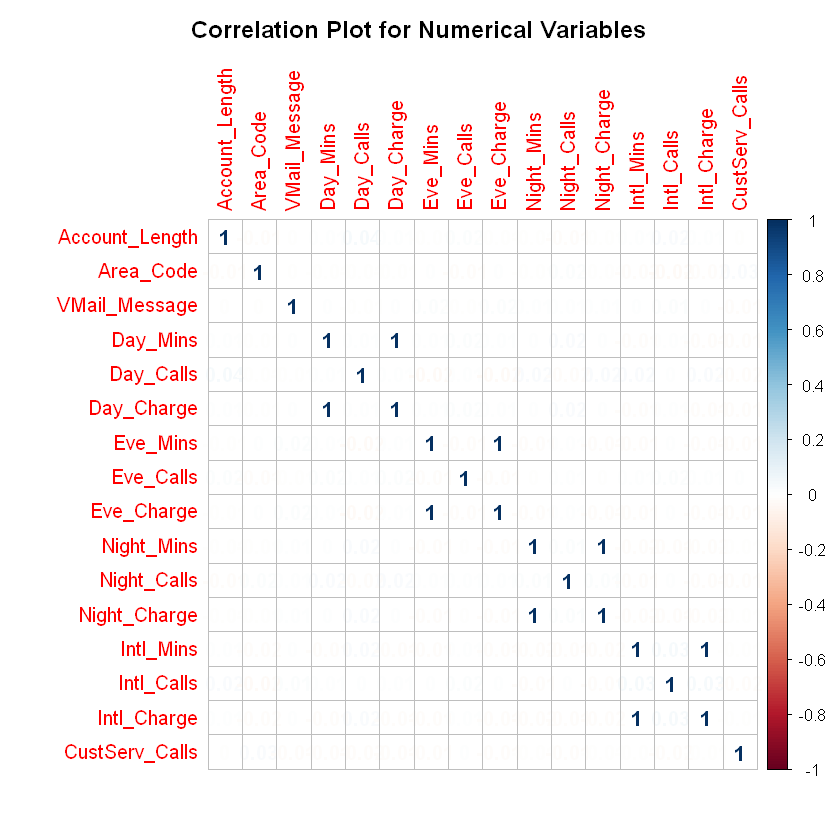

In [4]:
#Step 3: Determine correlation of numeric data(only)
#Correlation is observed between "Charge" and "Mins" columns, explored further in next step
Numericdata= sapply(celldata, is.numeric)
CorMat= cor(celldata[,Numericdata])
corrplot(CorMat, main="\n\nCorrelation Plot for Numerical Variables", method="number")


Call:
lm(formula = Night_Mins ~ Night_Charge, data = celldata)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.112786 -0.053554  0.001695  0.056717  0.117352 

Coefficients:
              Estimate Std. Error   t value Pr(>|t|)    
(Intercept)  2.696e-03  4.497e-03     0.599    0.549    
Night_Charge 2.222e+01  4.825e-04 46057.770   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06338 on 3331 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.121e+09 on 1 and 3331 DF,  p-value: < 2.2e-16



	Pearson's product-moment correlation

data:  celldata$Day_Mins and celldata$Day_Charge
t = 186640, df = 3331, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9999999 1.0000000
sample estimates:
cor 
  1 


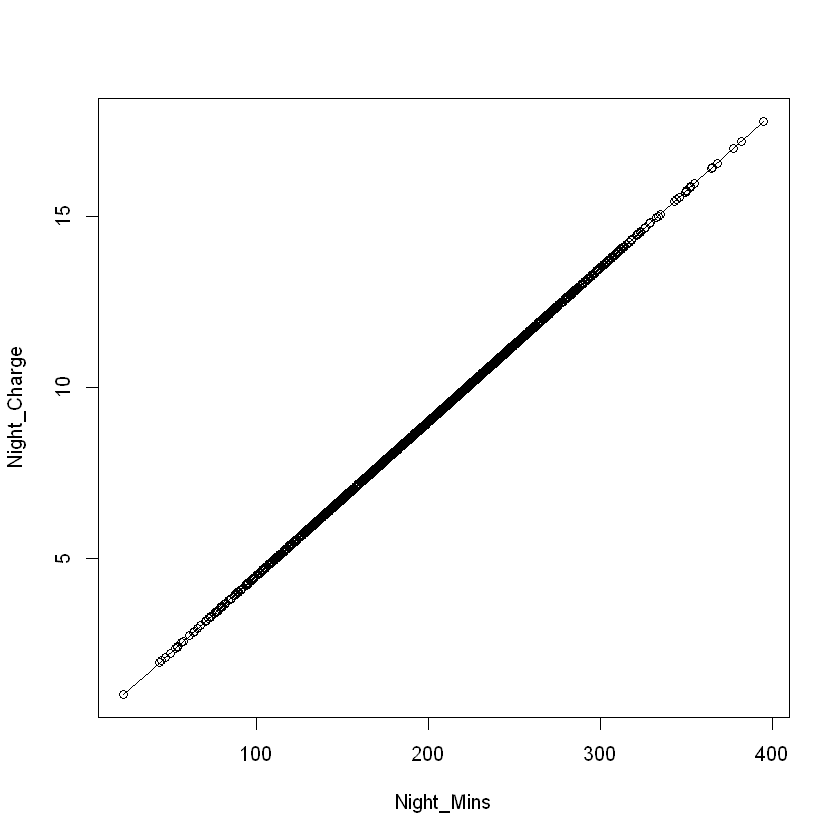

In [5]:
#Step 4: Based on previous steps, correlation between "Mins" and "Charge" columns are confirmed(linear)
#Example correlation("Night_Mins" & "Night_Charge") is examined(pearson test) and plotted for confirmation
#Similar correlations are observed for all "Mins" and "Charge" related columns
scatter.smooth(x=celldata$Night_Mins, y=celldata$Night_Charge,
               xlab="Night_Mins",ylab="Night_Charge")
summary(lm(Night_Mins ~ Night_Charge, data=celldata))
cor.test(celldata$Day_Mins, celldata$Day_Charge,method = "pearson")

In [6]:
#Step 5: Data is 'cleaned'
#"Churn?" is renamed  "Churn" for syntax purposes
#Correlated data is removed(Null)
#All numeric data is 'scaled'
#All binary string("yes/no","True/False") data is 'mapped' to binary numeric data("1/0")
#"celldata" is printed before("Before") and after("After") cleaning
print("Before")
print(celldata[1:3,])
colnames(celldata)[colnames(celldata)=="Churn?"]= "Churn"
celldata[,sapply(celldata,is.numeric)]=scale(celldata[,sapply(celldata,is.numeric)])
celldata$Phone= NULL; celldata$Day_Mins= NULL
celldata$Eve_Mins= NULL; celldata$Night_Mins= NULL
celldata$Intl_Mins= NULL; celldata$State= NULL
celldata$Area_Code= NULL; celldata$VMail_Plan= NULL
celldata$Churn= as.factor(mapvalues(celldata$Churn,from='False.',to=0))
celldata$Churn= as.factor(mapvalues(celldata$Churn,from='True.',to=1))
celldata$`Int'l_Plan`= as.factor(mapvalues(celldata$`Int'l_Plan`,from='no',to=0))
celldata$`Int'l_Plan`= as.factor(mapvalues(celldata$`Int'l_Plan`,from='yes',to=1))
print(" ");print(" ")
print("After")
print(celldata[1:3,])

[1] "Before"
# A tibble: 3 x 21
  State Account_Length Area_Code Phone `Int'l_Plan` VMail_Plan VMail_Message
  <chr>          <dbl>     <dbl> <chr> <chr>        <chr>              <dbl>
1 KS               128       415 382-~ no           yes                   25
2 OH               107       415 371-~ no           yes                   26
3 NJ               137       415 358-~ no           no                     0
# ... with 14 more variables: Day_Mins <dbl>, Day_Calls <dbl>,
#   Day_Charge <dbl>, Eve_Mins <dbl>, Eve_Calls <dbl>, Eve_Charge <dbl>,
#   Night_Mins <dbl>, Night_Calls <dbl>, Night_Charge <dbl>, Intl_Mins <dbl>,
#   Intl_Calls <dbl>, Intl_Charge <dbl>, CustServ_Calls <dbl>, `Churn?` <chr>
[1] " "
[1] " "
[1] "After"
# A tibble: 3 x 13
  Account_Length `Int'l_Plan` VMail_Message Day_Calls Day_Charge Eve_Calls
           <dbl> <fct>                <dbl>     <dbl>      <dbl>     <dbl>
1          0.676 0                    1.23      0.477      1.57    -0.0559
2          0.149 0 

In [7]:
#Step 6: Data is partitioned with respect to "Churn"
#Partition is based on p(0.7)
#Percent partition is printed for confirmation
intrain= createDataPartition(celldata$Churn,p=0.7,list=FALSE)
traindata= celldata[intrain,]
testdata= celldata[-intrain,]
print(paste('Portion of Training Data',
            max(dim(intrain))/max(dim(celldata))))

[1] "Portion of Training Data 0.7002700270027"


In [8]:
#Step 7: General Linear Regression model is trained, tested and summarized
#Summary of linear model(P(>|z|), deviance table analysis(P(>Chi)), confusion matrix and accuracy are printed
GLogModel= glm(Churn ~ .,family=binomial(link="logit"),data=traindata)
summary(GLogModel)
print("Analysis of Deviance Table")
anova(GLogModel, test="Chisq")
fitted.results= predict(GLogModel,newdata=testdata,type='response')
fitted.results= ifelse(fitted.results > 0.5,1,0)
misClasificError= mean(fitted.results != testdata$Churn)
print("Confusion Matrix for G-Logistic Regression") 
table(testdata$Churn, fitted.results > 0.5)
print(paste('G-Logistic Regression Accuracy',1-misClasificError))
#-Analysis of Deviance Table is commented below for additional conveniance-
# Analysis of Deviance Table
# 
# Model: binomial, link: logit
# 
# Response: Churn
# 
# Terms added sequentially (first to last)
# 
# 
# Df Deviance Resid. Df Resid.    Dev      Pr(>Chi)    
# NULL                            2333     1934.3              
# Account_Length  1    1.376      2332     1932.9 0.2408072    
# `Int'l_Plan`    1  108.445      2331     1824.5 < 2.2e-16 ***
# VMail_Message   1   23.163      2330     1801.3 1.488e-06 ***
# Day_Calls       1    3.186      2329     1798.1 0.0742639 .  
# Day_Charge      1   98.308      2328     1699.8 < 2.2e-16 ***
# Eve_Calls       1    0.400      2327     1699.4 0.5270908    
# Eve_Charge      1   34.353      2326     1665.0 4.597e-09 ***
# Night_Calls     1    0.038      2325     1665.0 0.8461115    
# Night_Charge    1    7.590      2324     1657.4 0.0058708 ** 
# Intl_Calls      1   11.658      2323     1645.8 0.0006391 ***
# Intl_Charge     1   18.215      2322     1627.5 1.974e-05 ***
# CustServ_Calls  1  115.672      2321     1511.9 < 2.2e-16 ***
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1378  -0.5172  -0.3406  -0.1906   3.0144  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.50093    0.09235 -27.080  < 2e-16 ***
Account_Length  0.02296    0.06605   0.348 0.728115    
`Int'l_Plan`1   1.98793    0.17755  11.197  < 2e-16 ***
VMail_Message  -0.41460    0.07717  -5.373 7.76e-08 ***
Day_Calls       0.12763    0.06731   1.896 0.057950 .  
Day_Charge      0.72116    0.07003  10.298  < 2e-16 ***
Eve_Calls      -0.02225    0.06748  -0.330 0.741634    
Eve_Charge      0.44074    0.06872   6.413 1.42e-10 ***
Night_Calls     0.04610    0.06777   0.680 0.496391    
Night_Charge    0.19215    0.06588   2.917 0.003539 ** 
Intl_Calls     -0.25807    0.07424  -3.476 0.000509 ***
Intl_Charge     0.28964    0.06764   4.282 1.85e-05 ***
CustServ_Calls  0.65182    0.06107  10.673  < 2e-16 ***
--

[1] " "


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,2333,1934.280,NA
Account_Length,1,1.37586223,2332,1932.904,2.408072e-01
`Int'l_Plan`,1,108.44545180,2331,1824.459,2.146779e-25
VMail_Message,1,23.16284958,2330,1801.296,1.488453e-06
Day_Calls,1,3.18616805,2329,1798.110,7.426390e-02
Day_Charge,1,98.30759285,2328,1699.802,3.581899e-23
Eve_Calls,1,0.39999692,2327,1699.402,5.270908e-01
Eve_Charge,1,34.35284826,2326,1665.049,4.597271e-09
Night_Calls,1,0.03766789,2325,1665.012,8.461115e-01
Night_Charge,1,7.58954809,2324,1657.422,5.870766e-03


[1] " "
[1] "Confusion Matrix for G-Logistic Regression"


   
    FALSE TRUE
  0   831   24
  1   107   37

[1] "G-Logistic Regression Accuracy 0.868868868868869"


[1] "Confusion Matrix for Decision Tree"


         Actual
Predicted   0   1
        0 822  88
        1  33  56

[1] "Decision Tree Accuracy 0.878878878878879"


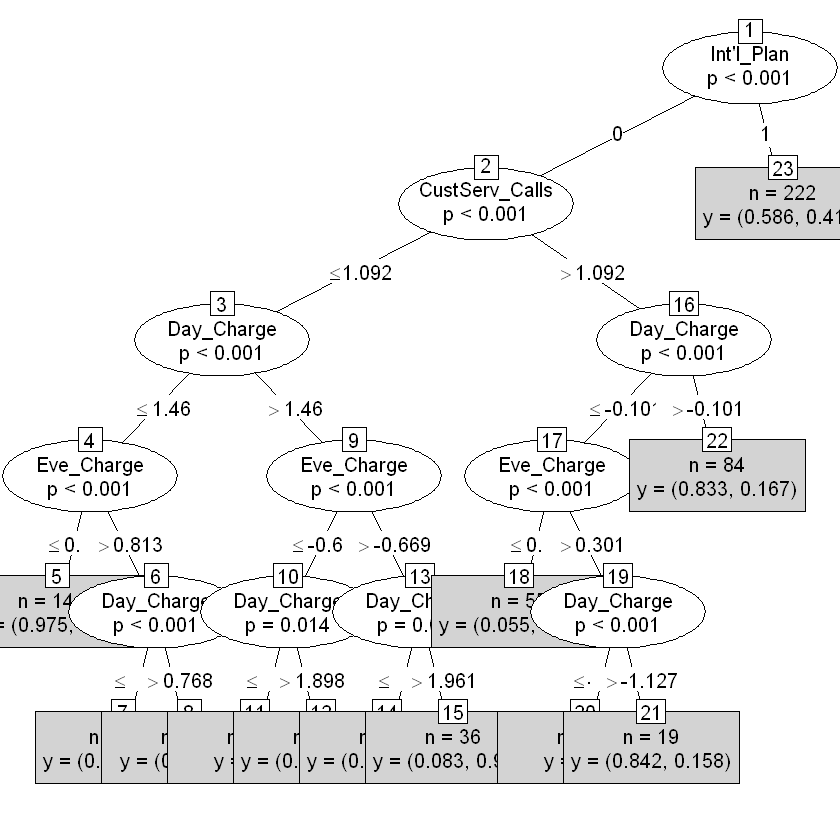

In [9]:
#Step 8: Decision Tree is trained and tested based on Signif. codes:'***' of previous step
#"Day_Charge","CustServ_Calls","`Int'l_Plan`" and "Eve_Charge" are used to build the tree
#Confusion matrix, tree outline and accuracy are printed
tree= ctree(Churn~Day_Charge+CustServ_Calls+`Int'l_Plan`+Eve_Charge, traindata)
plot(tree, y = NULL, type = "simple")
pred_tree= predict(tree, testdata)
print("Confusion Matrix for Decision Tree") 
table(Predicted = pred_tree, Actual = testdata$Churn)
p1= predict(tree, traindata)
tab1= table(Predicted = p1, Actual = traindata$Churn)
tab2= table(Predicted = pred_tree, Actual = testdata$Churn)
print(paste('Decision Tree Accuracy',sum(diag(tab2))/sum(tab2)))

In [10]:
#Step 9: K-Fold Validation(5) is applied to data(General Linear Model)
#Model of validation(including accuracy) is printed
Kvalidtrain <- trainControl(method = "cv", number = 5)
Errormodel=train(Churn~., data = celldata, method = "glm",trControl = Kvalidtrain)
print(Errormodel)

Generalized Linear Model 

3333 samples
  12 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 2666, 2667, 2666, 2667, 2666 
Resampling results:

  Accuracy   Kappa    
  0.8610888  0.2451275

